# Problem Statement

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Data Description

1. survival--> Survival	(0 = No, 1 = Yes)
2. pclass--> Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
3. sex--> Sex	
4. Age--> Age in years	
5. sibsp--> Number of siblings / spouses aboard the Titanic	
6. parch--> Number of parents / children aboard the Titanic	
7. ticket--> Ticket number	
8. fare--> Passenger fare	
9. cabin--> Cabin number	
10. embarked--> Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)

pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way... Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way... Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

# Importing the libraries

In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

In [260]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 96F3-7600

 Directory of C:\Users\Beauty\Documents\Kaggle\Titanic

17-08-2022  14:05    <DIR>          .
17-08-2022  14:05    <DIR>          ..
16-08-2022  19:54    <DIR>          .ipynb_checkpoints
11-12-2019  02:17             3,258 gender_submission.csv
11-12-2019  02:17            28,629 test.csv
17-08-2022  14:05           421,669 Titanic_kaggle.ipynb
11-12-2019  02:17            61,194 train.csv
               4 File(s)        514,750 bytes
               3 Dir(s)  126,097,190,912 bytes free


# Importing and reading the data

In [261]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
gs=pd.read_csv("gender_submission.csv")

In [262]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [263]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [264]:
gs

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# EDA 

In [265]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [266]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [267]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [268]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [269]:
train.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<AxesSubplot:>

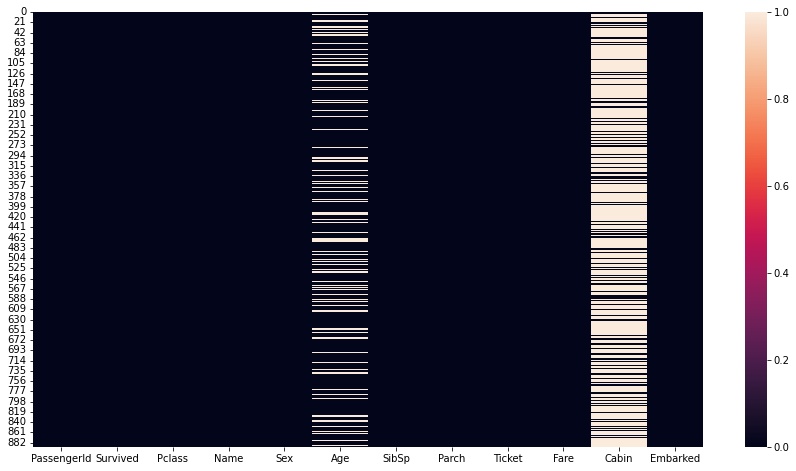

In [270]:
plt.figure(figsize=(15,8))
sns.heatmap(train.isna())

There are missing values in "Age", "Cabin" and "Embarked" columns.

In [271]:
test.isna().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<AxesSubplot:>

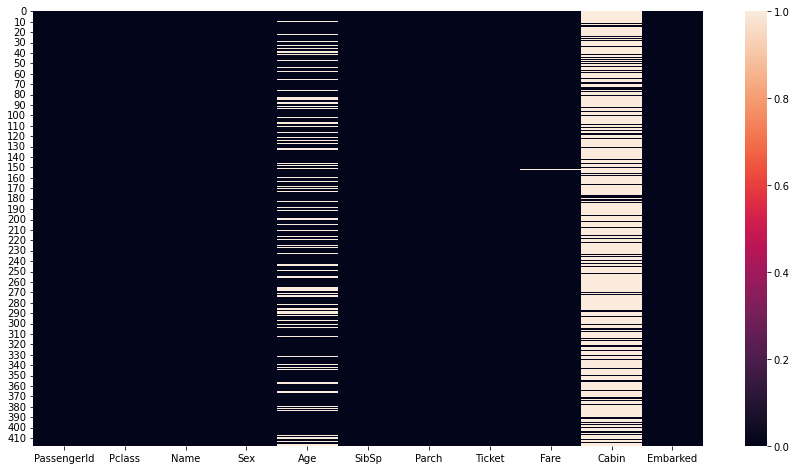

In [272]:
plt.figure(figsize=(15,8))
sns.heatmap(test.isna())

There are missing values in "Age", "Cabin" and "Fare" columns.

Text(0, 0.5, 'Counts')

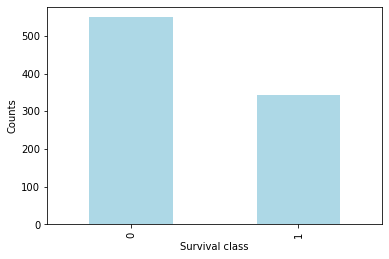

In [273]:
train['Survived'].value_counts().plot(kind='bar',color='lightblue')
plt.xlabel("Survival class")
plt.ylabel("Counts")

In [274]:
# Percentage of Survival

not_survived=len(train[train['Survived']==0])
survived=len(train[train['Survived']==1])
per_not_survived=not_survived/(not_survived+survived)
per_survived=survived/(not_survived+survived)
print("Percentage of Passengers that survived are: ",np.round(per_survived,3))
print("Percentage of Passengers that did not survived are: ",np.round(per_not_survived,3))

Percentage of Passengers that survived are:  0.384
Percentage of Passengers that did not survived are:  0.616


# Categorical Features

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

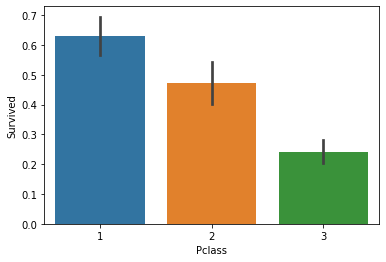

In [275]:
# Category--> Pclass
sns.barplot(x='Pclass',y='Survived',data=train)

<AxesSubplot:xlabel='Survived'>

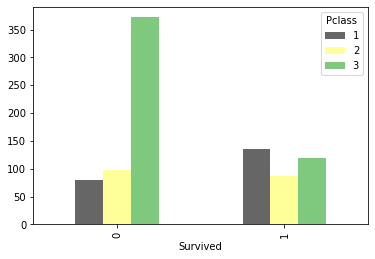

In [276]:
pd.crosstab(train['Survived'],train['Pclass']).plot(kind='bar',cmap='Accent_r')

We can conclude from above graphs that the chances of survival for a 1st class ticket passenger is higher than those with 2nd and 3rd class tickets.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

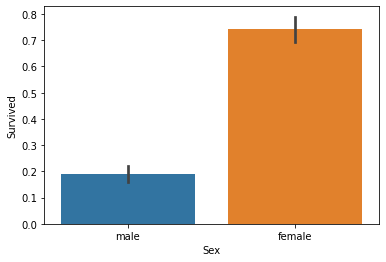

In [277]:
# Category--> Sex
sns.barplot(x='Sex',y='Survived',data=train)

<AxesSubplot:xlabel='Survived'>

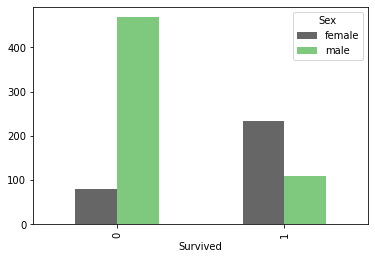

In [278]:
pd.crosstab(train['Survived'],train['Sex']).plot(kind='bar',cmap='Accent_r')

From the above graphs we can say that the Females are having higher survival chances than the men.

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

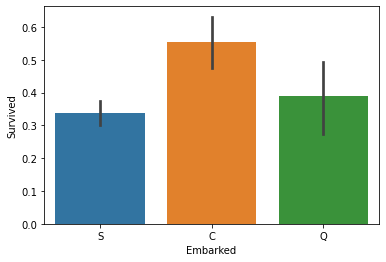

In [279]:
# Category--> Embarked
sns.barplot(x='Embarked',y='Survived',data=train)

<AxesSubplot:xlabel='Survived'>

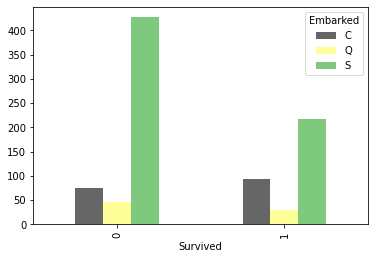

In [280]:
pd.crosstab(train['Survived'],train['Embarked']).plot(kind='bar',cmap='Accent_r')

From the graphs we can conclude that the chances of survival are higher for those passengers who boarded from Cherbourg, than those who boarded from Queenstown or Southampton.

<AxesSubplot:xlabel='Pclass'>

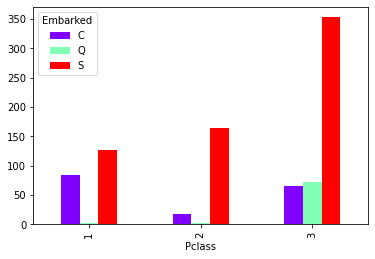

In [281]:
pd.crosstab(train['Pclass'],train['Embarked']).plot(kind='bar',cmap='rainbow')

From the graph, we can see that most people boarding from Cherbourg are coming from class 1, and hence having high chances of survival.
Also, most people boarding from southampton are coming from class 3 and hence having low chances of survival

<AxesSubplot:xlabel='Sex'>

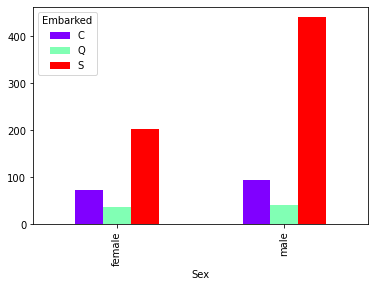

In [282]:
pd.crosstab(train['Sex'],train['Embarked']).plot(kind='bar',cmap='rainbow')

"Sex" has no effect on survial, when considered along with the "Embarked" column.

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

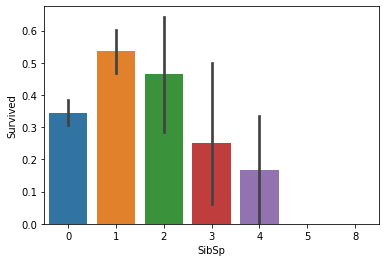

In [283]:
# Category--> SibSp
sns.barplot(train['SibSp'],train['Survived'])

<AxesSubplot:xlabel='SibSp'>

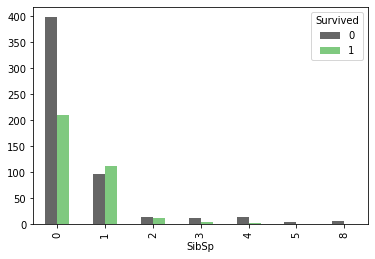

In [284]:
pd.crosstab(train['SibSp'],train['Survived']).plot(kind='bar',cmap='Accent_r')

From above graphs, we can say that the chances of survival of a passenger is higher if he/she has less number of Siblings/Spouses aboard.

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

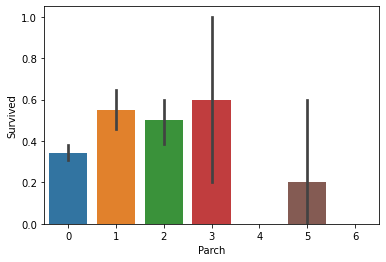

In [285]:
# Category--> Parch
sns.barplot(train['Parch'],train['Survived'])

<AxesSubplot:xlabel='Parch'>

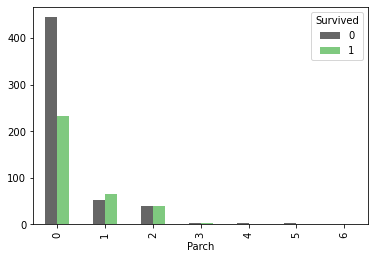

In [286]:
pd.crosstab(train['Parch'],train['Survived']).plot(kind='bar',cmap='Accent_r')

Passengers having less children/Parents are having high survival chances.

# Continuos features

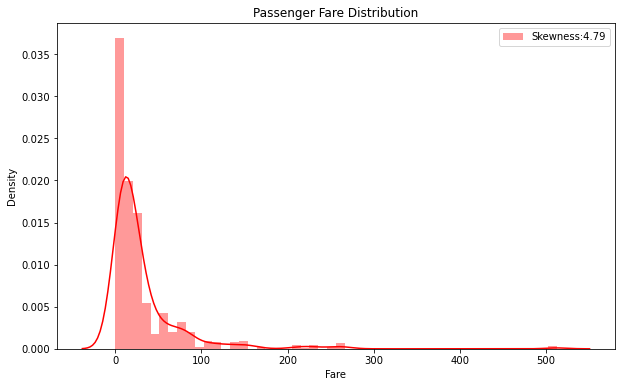

In [287]:
# Fare
skew=np.round(train['Fare'].skew(),2)
plt.figure(figsize=(10,6))
sns.distplot(train['Fare'],kde=True,color='red',label='Skewness:'+str(skew))
plt.title("Passenger Fare Distribution")
plt.legend(loc='best')

The skewness of Fare seems to be high.

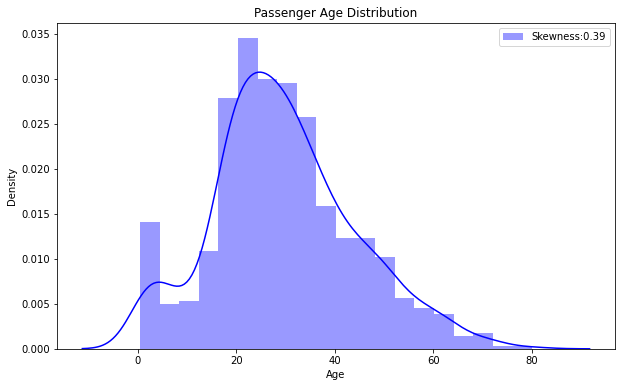

In [288]:
# Age
skew=np.round(train['Age'].skew(),2)
plt.figure(figsize=(10,6))
sns.distplot(train['Age'],kde=True,color='blue',label='Skewness:'+str(skew))
plt.title("Passenger Age Distribution")
plt.legend(loc='best')

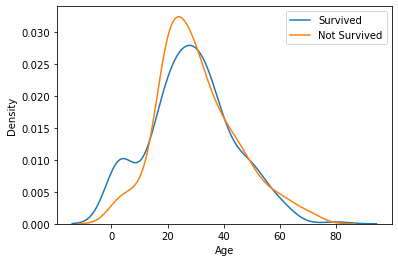

In [289]:
sns.kdeplot(train['Age'][train['Survived']==1],label='Survived')
sns.kdeplot(train['Age'][train['Survived']==0],label='Not Survived')
plt.legend(loc='best')

Children and people of middle age from 20 to 40 have higher chances of survival.

<AxesSubplot:>

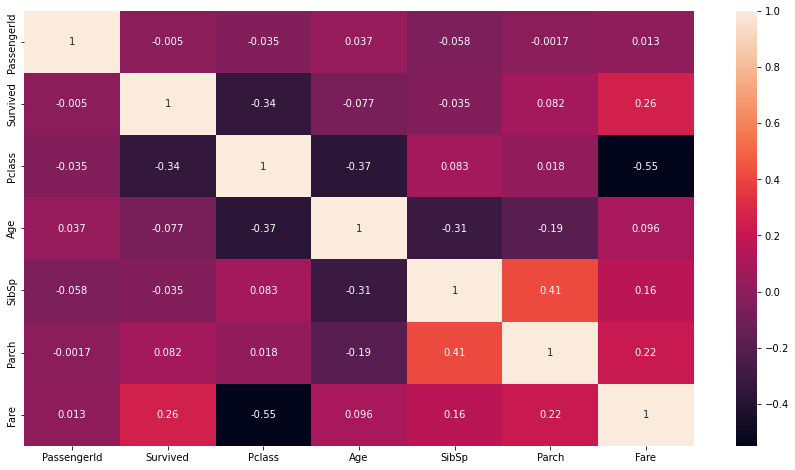

In [290]:
# Correlation between features
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),annot=True)

We can see that there is a significant positive correlation between Fare and Survived. The higher the fare paid by the passenger, the higher the chances of his survival.

# Data Preprocessing

# Dealing with missing values

In [291]:
train.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [292]:
test.isna().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [293]:
# Dropping the Cabin and Tickets Columns from train and test sets
train.drop(columns='Cabin',axis=1,inplace=True)
train.drop(columns='Ticket',axis=1,inplace=True)

test.drop(columns='Cabin',axis=1,inplace=True)
test.drop(columns='Ticket',axis=1,inplace=True)

In [294]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [295]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [296]:
# Replacing the missing values in "Embarked" in train set by its mode
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

In [297]:
# Replacing the missing values in "Fare" in test set by its median
test['Fare'].fillna(test['Fare'].median(),inplace=True)

In [298]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [299]:
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

Now the only missing value is in "Age".

In [300]:
# Combining both train and test data
df=pd.concat([train,test],axis=0).reset_index(drop=True)

In [301]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [302]:
df.isna().sum().sort_values(ascending=False)

Survived       418
Age            263
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [303]:
# Filling the missing values in "Age" with its Meadian 
df['Age'].fillna(df['Age'].median(),inplace=True)

In [304]:
df.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

<AxesSubplot:>

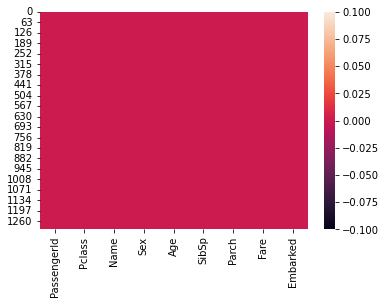

In [305]:
sns.heatmap(df.drop(columns='Survived').isna())

There are no missing values in the data.

# Data Transformation

The Fare column of the data was positively skewed and we have to apply log transformation to that column in order to deal with it's skewness.

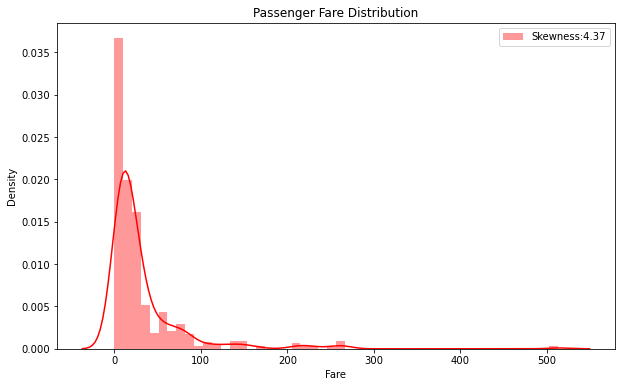

In [306]:
# Before Transformation

skewness=np.round(df['Fare'].skew(),2)
plt.figure(figsize=(10,6))
sns.distplot(df['Fare'],kde=True,color='red',label='Skewness:'+str(skewness))
plt.title("Passenger Fare Distribution")
plt.legend(loc='best')

In [307]:
# Log Transformation
df['Fare']=df['Fare'].apply(lambda x: np.log(x) if x>0 else 0)

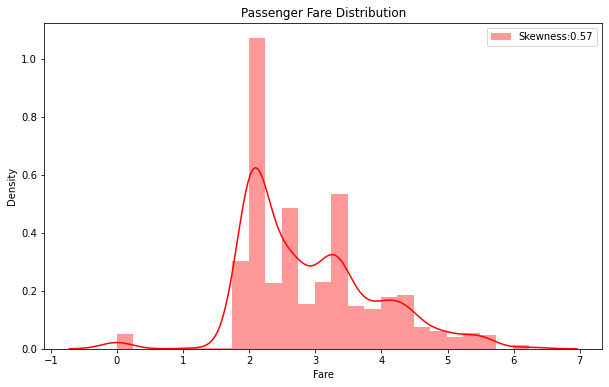

In [308]:
# After Transformation

skewness=np.round(df['Fare'].skew(),2)
plt.figure(figsize=(10,6))
sns.distplot(df['Fare'],kde=True,color='red',label='Skewness:'+str(skewness))
plt.title("Passenger Fare Distribution")
plt.legend(loc='best')

The skewness has reduced from 4.37 to 0.57.

In [310]:
# Dropping the Name Column
df.drop(columns='Name',inplace=True)

In [311]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,1.981001,S
1,2,1.0,1,female,38.0,1,0,4.266662,C
2,3,1.0,3,female,26.0,0,0,2.070022,S
3,4,1.0,1,female,35.0,1,0,3.972177,S
4,5,0.0,3,male,35.0,0,0,2.085672,S


# Label Encoding

In [312]:
label_encoder=preprocessing.LabelEncoder()
df['sex']=label_encoder.fit_transform(df['Sex'])                   # Male--> 1, Female--> 0
df['embarked']=label_encoder.fit_transform(df['Embarked'])         # C=0, Q=1, S=2

In [313]:
df.drop(columns='Sex',inplace=True)  
df.drop(columns='Embarked',inplace=True)    

In [314]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex,embarked
0,1,0.0,3,22.0,1,0,1.981001,1,2
1,2,1.0,1,38.0,1,0,4.266662,0,0
2,3,1.0,3,26.0,0,0,2.070022,0,2
3,4,1.0,1,35.0,1,0,3.972177,0,2
4,5,0.0,3,35.0,0,0,2.085672,1,2
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,28.0,0,0,2.085672,1,2
1305,1306,NaN,1,39.0,0,0,4.690430,0,0
1306,1307,NaN,3,38.5,0,0,1.981001,1,2
1307,1308,NaN,3,28.0,0,0,2.085672,1,2


# Splitting into Train and Test

In [315]:
len(train)

891

In [316]:
len(test)

418

In [379]:
# converting the dataframe back to train and tes
train=df[:len(train)]
test=df[len(train):]

In [380]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex,embarked
0,1,0.0,3,22.0,1,0,1.981001,1,2
1,2,1.0,1,38.0,1,0,4.266662,0,0
2,3,1.0,3,26.0,0,0,2.070022,0,2
3,4,1.0,1,35.0,1,0,3.972177,0,2
4,5,0.0,3,35.0,0,0,2.085672,1,2
...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,27.0,0,0,2.564949,1,2
887,888,1.0,1,19.0,0,0,3.401197,0,2
888,889,0.0,3,28.0,1,2,3.154870,0,2
889,890,1.0,1,26.0,0,0,3.401197,1,0


In [381]:
test

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,sex,embarked
891,892,NaN,3,34.5,0,0,2.057860,1,1
892,893,NaN,3,47.0,1,0,1.945910,0,2
893,894,NaN,2,62.0,0,0,2.270836,1,1
894,895,NaN,3,27.0,0,0,2.159003,1,2
895,896,NaN,3,22.0,1,1,2.508582,0,2
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,28.0,0,0,2.085672,1,2
1305,1306,NaN,1,39.0,0,0,4.690430,0,0
1306,1307,NaN,3,38.5,0,0,1.981001,1,2
1307,1308,NaN,3,28.0,0,0,2.085672,1,2


In [382]:
# Dropping Passengerid column from train data
train.drop(columns='PassengerId',inplace=True)

In [383]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,sex,embarked
0,0.0,3,22.0,1,0,1.981001,1,2
1,1.0,1,38.0,1,0,4.266662,0,0
2,1.0,3,26.0,0,0,2.070022,0,2
3,1.0,1,35.0,1,0,3.972177,0,2
4,0.0,3,35.0,0,0,2.085672,1,2
...,...,...,...,...,...,...,...,...
886,0.0,2,27.0,0,0,2.564949,1,2
887,1.0,1,19.0,0,0,3.401197,0,2
888,0.0,3,28.0,1,2,3.154870,0,2
889,1.0,1,26.0,0,0,3.401197,1,0


In [384]:
# Dropping the Survived column from test data since we have to predict it
test.drop(columns='Survived',inplace=True)

In [385]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,sex,embarked
891,892,3,34.5,0,0,2.057860,1,1
892,893,3,47.0,1,0,1.945910,0,2
893,894,2,62.0,0,0,2.270836,1,1
894,895,3,27.0,0,0,2.159003,1,2
895,896,3,22.0,1,1,2.508582,0,2
...,...,...,...,...,...,...,...,...
1304,1305,3,28.0,0,0,2.085672,1,2
1305,1306,1,39.0,0,0,4.690430,0,0
1306,1307,3,38.5,0,0,1.981001,1,2
1307,1308,3,28.0,0,0,2.085672,1,2


In [386]:
# Splitting the data into training and testing
x_train=train.iloc[:,1:-1]
y_train=train.iloc[:,0]
x_test=test.iloc[:,1:-1]

In [387]:
print("Shape of x_train",x_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of x_test",x_test.shape)

Shape of x_train (891, 6)
Shape of y_train (891,)
Shape of x_test (418, 6)


# Model Creation

# Logistic Regression

In [388]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)
lr_train_pred=lr_model.predict(x_train)
lr_test_pred=lr_model.predict(x_test)
lr_train_acc=np.round(accuracy_score(lr_train_pred,y_train)*100,3)

In [389]:
lr_train_acc

79.574

# Decision Tree Classifier

In [390]:
dt_model=DecisionTreeClassifier(criterion='entropy',min_samples_split=5,random_state=9)
dt_model.fit(x_train,y_train)
dt_train_pred=dt_model.predict(x_train)
dt_test_pred=dt_model.predict(x_test)
dt_train_acc=np.round(accuracy_score(dt_train_pred,y_train)*100,3)

In [391]:
dt_train_acc

95.062

# Bagging Classifier

In [392]:
bg_model=BaggingClassifier(n_estimators=20,max_samples=0.8,random_state=2)
bg_model.fit(x_train,y_train)
bg_train_pred=bg_model.predict(x_train)
bg_test_pred=bg_model.predict(x_test)
bg_train_acc=np.round(accuracy_score(bg_train_pred,y_train)*100,3)

In [393]:
bg_train_acc

96.296

# Random Forest Classifier

In [394]:
rf_model=RandomForestClassifier(n_estimators=100,min_samples_split=2,criterion='gini',max_features='auto',max_samples=0.8,random_state=1)
rf_model.fit(x_train,y_train)
rf_train_pred=rf_model.predict(x_train)
rf_test_pred=rf_model.predict(x_test)
rf_train_acc=np.round(accuracy_score(rf_train_pred,y_train)*100,3)

In [395]:
rf_train_acc

97.868

# K-Nearest Neighbours

In [396]:
# Finding Optimal value of "K"

from sklearn.metrics import accuracy_score
k_range=range(3,40,2)
score=[]
for i in k_range:
    knn_model=KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(x_train,y_train)
    knn_train_pred=knn_model.predict(x_train)
    knn_test_pred=knn_model.predict(x_test)
    score.append(accuracy_score(y_train,knn_train_pred))

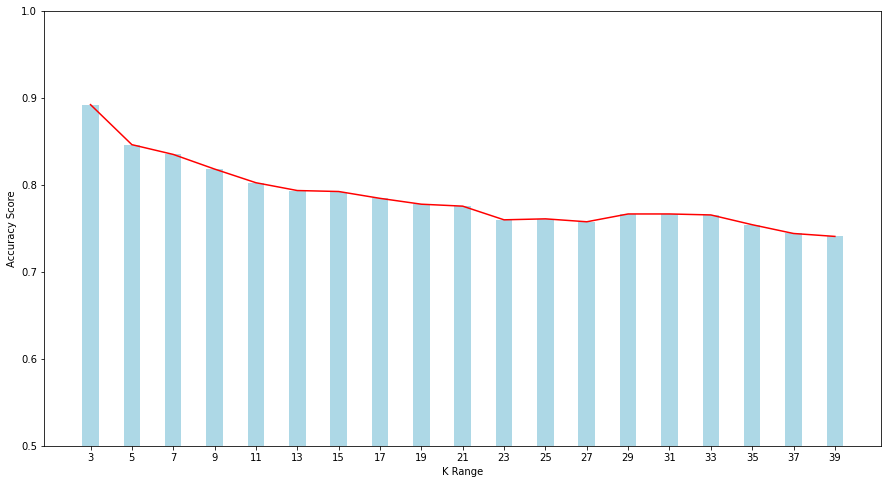

In [397]:
# Plotting for better understanding

plt.figure(figsize=(15,8))
plt.bar(k_range,score,color='lightblue')
plt.plot(k_range,score,color='red')
plt.xticks(k_range)
plt.xlabel("K Range")
plt.ylabel("Accuracy Score")
plt.ylim(0.5,1)
plt.show()

In [398]:
results=pd.DataFrame({'K value':k_range,'Accuracy':score})
results.sort_values('Accuracy',ascending=False)

,K value,Accuracy
0,3,0.892256
1,5,0.846240
2,7,0.835017
3,9,0.818182
4,11,0.802469
5,13,0.793490
6,15,0.792368
7,17,0.784512
8,19,0.777778
9,21,0.775533


The highest accuracy is obtained using k=3

In [399]:
# Creating a model using k=3
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)
knn_train_pred=knn_model.predict(x_train)
knn_test_pred=knn_model.predict(x_test)
knn_train_acc=np.round(accuracy_score(knn_train_pred,y_train)*100,3)

In [400]:
knn_train_acc

89.226

# Support Vector Classifier

In [401]:
svc_model=SVC()
svc_model.fit(x_train,y_train)
svc_train_pred=svc_model.predict(x_train)
svc_test_pred=svc_model.predict(x_test)
svc_train_acc=np.round(accuracy_score(svc_train_pred,y_train)*100,3)

In [402]:
svc_train_acc

72.054

# Gaussian Naive Bayes

In [403]:
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)
nb_train_pred=nb_model.predict(x_train)
nb_test_pred=nb_model.predict(x_test)
nb_train_acc=np.round(accuracy_score(nb_train_pred,y_train)*100,3)

In [404]:
nb_train_acc

77.329

In [405]:
results=pd.DataFrame({'Models':['Logistic Regression','Decision Tree','Bagging',
                      'Random Forest','KNN','Support Vector Classifier','Gaussian Naive Bayes'],
                    'Score':[lr_train_acc,dt_train_acc,bg_train_acc,rf_train_acc,
                      knn_train_acc,svc_train_acc,nb_train_acc]})

In [406]:
results.sort_values('Score',ascending=False,ignore_index=True)

,Models,Score
0,Random Forest,97.868
1,Bagging,96.296
2,Decision Tree,95.062
3,KNN,89.226
4,Logistic Regression,79.574
5,Gaussian Naive Bayes,77.329
6,Support Vector Classifier,72.054


# Cross Validation

In [407]:
models=[LogisticRegression(),DecisionTreeClassifier(),BaggingClassifier(),RandomForestClassifier(),
        KNeighborsClassifier(),SVC(),GaussianNB()]
cv_scores=[]
for model in models:
    score=cross_val_score(model,x_train,y_train,scoring='accuracy',cv=10)
    cv_scores.append(score.mean())

In [408]:
results['cv_scores']=cv_scores

In [409]:
results.sort_values(by='cv_scores',ascending=False,ignore_index=True)

,Models,Score,cv_scores
0,Bagging,96.296,0.805918
1,Random Forest,97.868,0.802572
2,Logistic Regression,79.574,0.791248
3,KNN,89.226,0.785680
4,Decision Tree,95.062,0.775543
5,Gaussian Naive Bayes,77.329,0.768839
6,Support Vector Classifier,72.054,0.707116


We are getting highest cross validation score for Bagging Classifier.

Text(0, 0.5, 'Model')

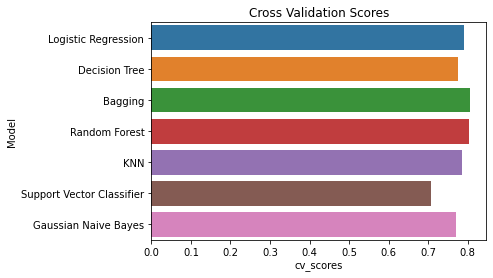

In [410]:
sns.barplot(x='cv_scores',y='Models',data=results)
plt.title("Cross Validation Scores")
plt.ylabel("Model")

# Hyperparameter tuning

In [411]:
param_grid={'n_estimators':[20,50,60,70,80,90,100],
                       'max_samples':[0.5,0.6,0.7,0.8,0.9]}

grid=GridSearchCV(BaggingClassifier(),param_grid,scoring='accuracy',cv=10)
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=BaggingClassifier(),
             param_grid={'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9],
                         'n_estimators': [20, 50, 60, 70, 80, 90, 100]},
             scoring='accuracy')

In [412]:
print('Best Parameters: ',grid.best_params_)
print('Best Scores: ',grid.best_score_)

Best Parameters:  {'max_samples': 0.5, 'n_estimators': 60}
Best Scores:  0.8294756554307116


In [417]:
# Creating the model using new parameters

model_final=BaggingClassifier(n_estimators=60,max_samples=0.5)
model_final.fit(x_train,y_train)
y_pred=model_final.predict(x_test)
train_acc=accuracy_score(y_train,model_final.predict(x_train))
train_acc

0.9281705948372615

In [418]:
# Cross Validation Score
cv_score=cross_val_score(model_final,x_train,y_train,cv=10,scoring='accuracy').mean()
cv_score

0.8261048689138578

In [419]:
# Predictions made by our model
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [420]:
len(y_pred)

418

# Final result

In [421]:
gs.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [422]:
gs.shape

(418, 2)

In [423]:
final_result=pd.DataFrame({'Passengerid':test['PassengerId'],'Survived':y_pred})

In [425]:
final_result.head()

,Passengerid,Survived
891,892,0.0
892,893,0.0
893,894,0.0
894,895,0.0
895,896,0.0


In [435]:
final_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  418 non-null    int64  
 1   Survived     418 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.7 KB


In [439]:
final_result['Survived']=final_result['Survived'].astype(dtype='int64')

In [440]:
final_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Passengerid  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [434]:
#final_result.to_csv(r'C:\Users\Beauty\Documents\Kaggle\Titanic\result_titanic',index=False)

In [441]:
filename = 'Titanic Predictions 2.csv'

final_result.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions 2.csv
